In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure',  figsize=(10, 10))
mpl.rc('image', cmap='gray')

In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
from tkinter.filedialog import askopenfilenames

In [6]:
video_path = askopenfilenames()


In [ ]:

%matplotlib qt
plt.figure()
plt.imshow(frames[0])
bottomsection = plt.ginput(2)

In [ ]:
#code to turn mp4 into png

import cv2
vidcap = cv2.VideoCapture('C:/Users/u6201343/Videos/vlc-record-2020-02-05-10h27m40s-run_26_4september_rn_0on1_omega_1p5_q_1p8_rho_1029.mp4-.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.png" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

In [3]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [75]:
outer_mask = create_circular_mask(1030,1030)
inner_mask = create_circular_mask(1030,1030, center= [490, 515],radius=145)

In [81]:
@pims.pipeline
def gray(image):
    image=image[40:-10,530:-360, 1]
    image[~outer_mask]=0
    image[inner_mask]=0
    return(image)

frames = gray(pims.open('C:/Users/u6201343/test_images/*.png'))

In [82]:
%matplotlib inline

In [91]:
f = tp.locate(frames[0], 15, minmass=201)

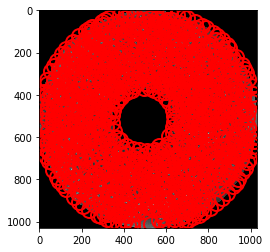

In [92]:
tp.annotate(f, frames[0])

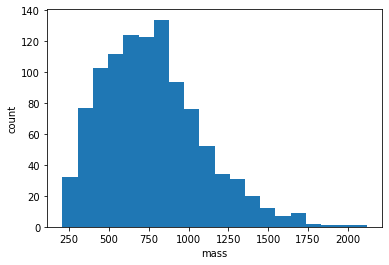

In [93]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029D938419B0>,
      dtype=object)

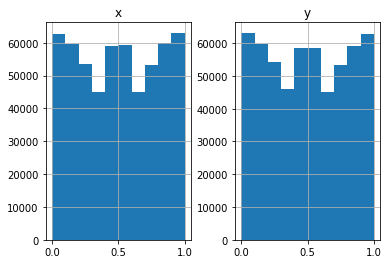

In [107]:
tp.subpx_bias(f)

In [106]:
f = tp.batch(frames[:300], 11, minmass=21);

Frame 299: 1829 features


In [108]:
t = tp.link(f, 5, memory=3)

Frame 299: 1829 trajectories present.


In [109]:
t1 = tp.filter_stubs(t, 25)

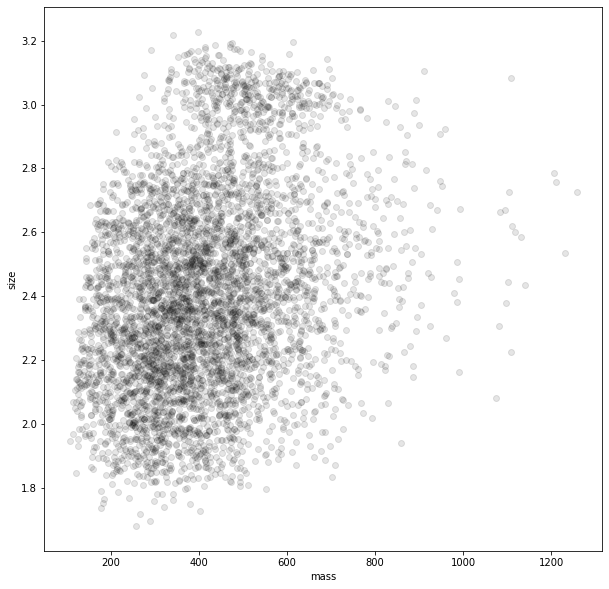

In [132]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

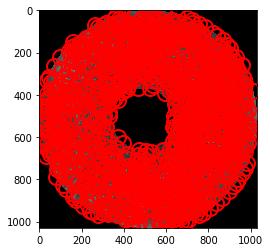

In [111]:
plt.figure()
tp.annotate(t1[t1['frame'] == 0], frames[0])

In [146]:
t2 = t1[((t1['mass'] > 50) & (t1['mass'] < 600) &(t1['size'] < 3) &
         (t1['ecc'] < 0.4))]

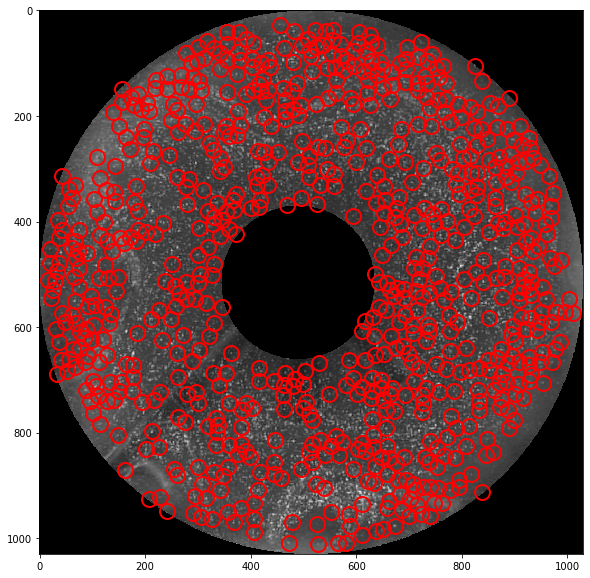

In [147]:
plt.figure()
tp.annotate(t2[t2['frame'] == 1], frames[1]);

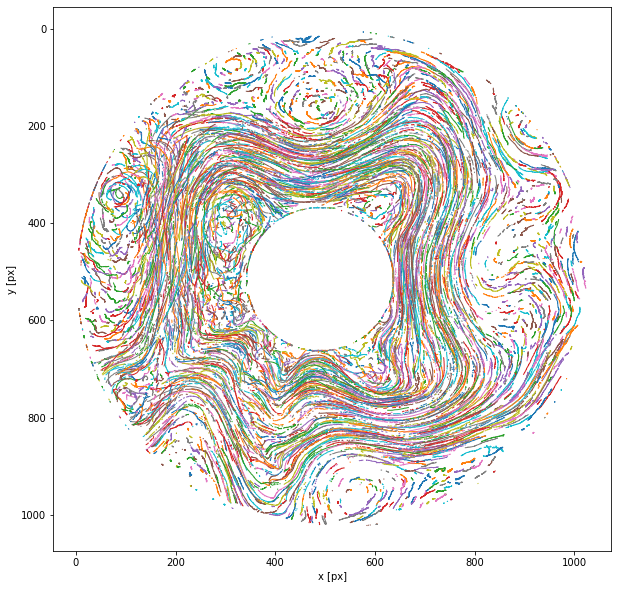

In [148]:
plt.figure(figsize=(10,10))
ax = tp.plot_traj(t2)
plt.show()

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
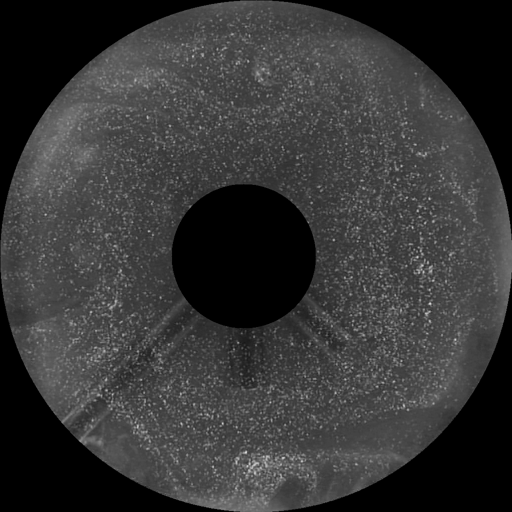

In [130]:
frames[400]